In [1]:
import matplotlib.pyplot as plt
from expdespy.datasets.dic_milho import load_dic_milho
from expdespy.datasets.dbc_caprinos import load_dbc_caprinos
from expdespy.models import DIC, DBC
from expdespy.utils import get_summary
from expdespy.posthoc import TukeyHSD, PairwiseTTest


# DIC (Delineamento Interamente ao Acaso)

## Load the data

In [2]:
print("### Exemplo DIC - Milho ###")

df_dic, desc_dic = load_dic_milho()
print("Descrição do dataset DIC:")
print(desc_dic)

### Exemplo DIC - Milho ###
Descrição do dataset DIC:
{'description': 'Experimento com 4 variedades de milho (A, B, C, D) distribuídas aleatoriamente em 20 parcelas (5 por variedade). A variável resposta é a produtividade em sacas por hectare. Usado para análise com DIC e testes de comparação múltipla.', 'source': 'Fictício', 'response': 'produtividade', 'trat': 'variedade'}


In [3]:
df_dic

,variedade,produtividade
0,A,25
1,A,26
2,A,20
3,A,23
4,A,21
5,B,31
6,B,25
7,B,28
8,B,27
9,B,24


In [4]:
get_summary(df_dic)

,clumn_dtype,na,na_pct,top_class,top_class_pct,nunique,unique_values
variedade,object,0,0.0,A,25.0,4,"[A, B, C, D]"
produtividade,int64,0,0.0,25,15.0,13,...


In [5]:
# Instanciar modelo
dic_model = DIC(data=df_dic, response="produtividade", treatment="variedade")

# ANOVA
anova_result = dic_model.anova()
print("\nTabela ANOVA DIC:")
print(anova_result)


Tabela ANOVA DIC:
              sum_sq    df         F    PR(>F) Signif
C(variedade)  163.75   3.0  7.797619  0.001976     **
Residual      112.00  16.0       NaN       NaN       


In [6]:
# Verificar pressupostos
alpha = 0.05
assumptions = dic_model.check_assumptions(alpha=alpha, print_conclusions=False)
print("\nPressupostos ANOVA:")
for test in assumptions:
    test_name = test
    p_value = assumptions.get(test_name).get("p-value")
    h0 = assumptions.get(test_name).get("H0")
    print(f"{test_name}: H0: {h0}")
    if p_value < alpha:
        print(f"p-value: {p_value} < {alpha} => Rejeitar H0")
    else:
        print(f"p-value: {p_value} > {alpha} => Não rejeitar H0")
    
    



Pressupostos ANOVA:
normality (Shapiro-Wilk): H0: The residuals are normally distributed
p-value: 0.2358735765866306 > 0.05 => Não rejeitar H0
homoscedasticity (Levene): H0: The variances of the groups are equal
p-value: 1.0 > 0.05 => Não rejeitar H0


## Post Hoc Analysis - Teste de Tukey

In [7]:
values_column = 'produtividade'
trats_column = 'variedade'


tukey_hsd = TukeyHSD(
    data=df_dic,
    values_column=values_column,
    trats_column=trats_column,
    alpha = 0.05
)
tukey_hsd.run_compact_letters_display()

,variedade,Mean,Letters
3,D,31.0,a
1,B,27.0,ab
2,C,26.0,b
0,A,23.0,b


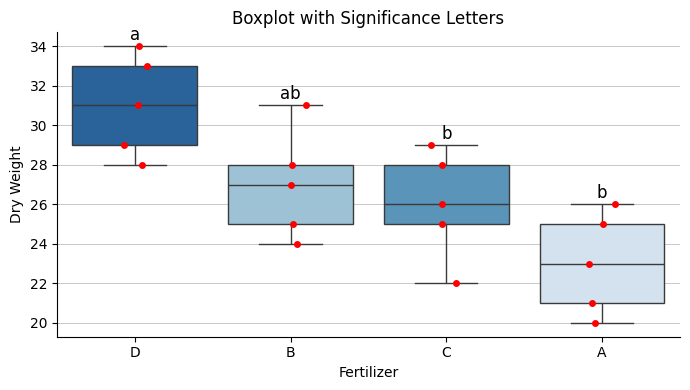

In [8]:
# Criar o gráfico
fig, ax = plt.subplots(figsize=(7, 4))
tukey_hsd.plot_compact_letters_display(ax=ax)
# Layout
plt.xlabel("Fertilizer")
plt.ylabel("Dry Weight")
plt.title("Boxplot with Significance Letters")


plt.tight_layout()
plt.show()

## Post Hoc Analysis - Teste de T

In [9]:
t_test = PairwiseTTest(
    data=df_dic,
    values_column=values_column,
    trats_column=trats_column,
    alpha = 0.05,
    equal_var = True  # Assume variâncias iguais (padrão como no ANOVA
)

t_test.run_compact_letters_display()

,variedade,Mean,Letters
3,D,31.0,a
1,B,27.0,b
2,C,26.0,bc
0,A,23.0,c


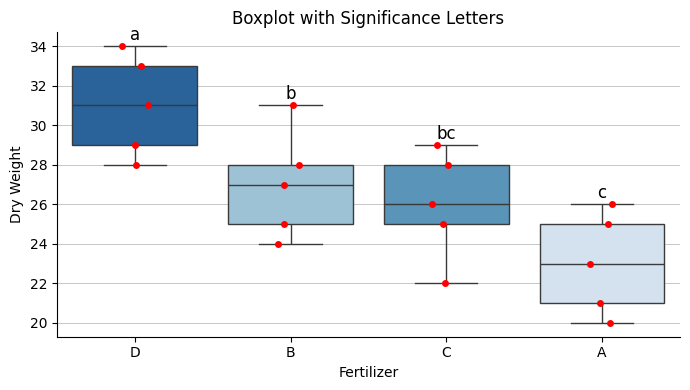

In [10]:

# Criar o gráfico
fig, ax = plt.subplots(figsize=(7, 4))
t_test.plot_compact_letters_display(ax=ax)
# Layout
plt.xlabel("Fertilizer")
plt.ylabel("Dry Weight")
plt.title("Boxplot with Significance Letters")


plt.tight_layout()
plt.show()

# Fatorial

In [18]:
from expdespy.datasets import load_fatorial_dic
from expdespy.models import FatorialDIC

df, desc = load_fatorial_dic()
model = FatorialDIC(data=df, response=desc['response'], factors=desc['factors'])

result = model.unfold_interactions(alpha=0.05, posthoc="ttest", print_results=False)
model.display_unfolded_interactions(result)
#


📊 ANOVA PRINCIPAL
+-------------+--------+-----+---------+--------+--------+
|             | sum_sq | df  |    F    | PR(>F) | Signif |
+-------------+--------+-----+---------+--------+--------+
|    C(f1)    | 1200.0 | 1.0 | 88.8889 |  0.0   |  ***   |
|    C(f2)    | 588.0  | 1.0 | 43.5556 | 0.0002 |  ***   |
| C(f1):C(f2) | 300.0  | 1.0 | 22.2222 | 0.0015 |   **   |
|  Residual   | 108.0  | 8.0 |   nan   |  nan   |        |
+-------------+--------+-----+---------+--------+--------+

🔬 DESDOBRAMENTOS DE INTERAÇÕES SIGNIFICATIVAS

🧩 f1 dentro de f2=0
- ANOVA:
|          |   sum_sq |   df |        F |   PR(>F) |
|----------|----------|------|----------|----------|
| C(f1)    |      150 |    1 |  13.6364 |    0.021 |
| Residual |       44 |    4 | nan      |  nan     |

- Post hoc:
   f1  Mean Letters
1   1  38.0       a
0   0  28.0       b

🧩 f1 dentro de f2=1
- ANOVA:
|          |   sum_sq |   df |       F |   PR(>F) |
|----------|----------|------|---------|----------|
| C(f1)    | 

In [12]:
import pandas as pd
import numpy as np
from itertools import product
from expdespy.models import FatorialDIC

# Simulando fatores com 2 níveis cada e 3 repetições
levels = [0, 1]
replicates = 3

combinations = list(product(levels, levels, levels))
data = []
np.random.seed(42)

for a, b, c in combinations:
    for _ in range(replicates):
        # Cria uma resposta com efeito aditivo e alguma interação
        y = (
            10 * a + 5 * b + 3 * c + 
            4 * a * b - 2 * b * c + 
            np.random.normal(0, 2)
        )
        data.append([a, b, c, y])

df = pd.DataFrame(data, columns=["A", "B", "C", "Y"])


model = FatorialDIC(data=df, response="Y", factors=["A", "B", "C"])
result = model.unfold_interactions(alpha=0.05, posthoc="tukey", print_results=False, max_interaction=3)
model.display_unfolded_interactions(result)


📊 ANOVA PRINCIPAL
+-----------------+----------+------+----------+--------+--------+
|                 |  sum_sq  |  df  |    F     | PR(>F) | Signif |
+-----------------+----------+------+----------+--------+--------+
|      C(A)       | 627.3805 | 1.0  | 167.9096 |  0.0   |  ***   |
|      C(B)       | 236.243  | 1.0  | 63.2271  |  0.0   |  ***   |
|      C(C_)      | 20.8764  | 1.0  |  5.5873  | 0.0311 |   *    |
|    C(A):C(B)    |  36.456  | 1.0  |  9.7569  | 0.0065 |   **   |
|   C(A):C(C_)    |  2.1867  | 1.0  |  0.5852  | 0.4554 |   ns   |
|   C(B):C(C_)    | 20.8173  | 1.0  |  5.5715  | 0.0313 |   *    |
| C(A):C(B):C(C_) |  0.0507  | 1.0  |  0.0136  | 0.9088 |   ns   |
|    Residual     | 59.7827  | 16.0 |   nan    |  nan   |        |
+-----------------+----------+------+----------+--------+--------+

🔬 DESDOBRAMENTOS DE INTERAÇÕES SIGNIFICATIVAS

🧩 A dentro de B=0
- ANOVA:
|          |   sum_sq |   df |        F |   PR(>F) |
|----------|----------|------|----------|--------

In [17]:
import pandas as pd
from expdespy.models import SplitPlotDIC

# 🔢 1. Criando um conjunto de dados simulado para parcelas subdivididas em DIC
def load_splitplot_dic_example():
    """
    Simula dados para um experimento de parcelas subdivididas em DIC.
    
    Fatores:
        - Main plot: 'cultivar' (A, B)
        - Subplot: 'adubo' (X, Y, Z)
    """
    data = []
    cultivares = ['A', 'B']
    adubos = ['X', 'Y', 'Z']
    replications = 4

    valores = {
        ('A', 'X'): [20.1, 19.8, 20.5, 19.9],
        ('A', 'Y'): [21.3, 21.0, 21.5, 21.1],
        ('A', 'Z'): [22.5, 22.7, 22.6, 22.9],
        ('B', 'X'): [19.5, 19.6, 19.4, 19.8],
        ('B', 'Y'): [21.0, 21.2, 20.9, 21.1],
        ('B', 'Z'): [23.1, 23.3, 23.0, 23.2],
    }

    for (cult, adubo), obs in valores.items():
        for i, y in enumerate(obs, start=1):
            data.append({'repetition': i, 'cultivar': cult, 'adubo': adubo, 'produtividade': y})

    df = pd.DataFrame(data)
    description = {
        "response": "produtividade",
        "main_plot": "cultivar",
        "subplot": "adubo"
    }
    return df, description

# 📦 2. Carregando os dados
df, desc = load_splitplot_dic_example()

# 👨‍🔬 3. Inicializando o modelo de parcelas subdivididas em DIC
model = SplitPlotDIC(
    data=df,
    response=desc["response"],
    main_plot=desc["main_plot"],
    subplot=desc["subplot"]
)

# 📊 4. ANOVA
anova_table = model.anova()
print("📊 Tabela ANOVA:")
print(anova_table)

# ✅ 5. Verificação de pressupostos
print("\n✅ Verificação de pressupostos:")
assumptions = model.check_assumptions()

# 🔬 6. Desdobramento de interações e teste post hoc
print("\n🔍 Desdobramento das interações:")
result = model.unfold_interactions()
model.display_unfolded_interactions(result)

📊 Tabela ANOVA:
                         sum_sq    df           F        PR(>F) Signif
C(cultivar)            0.026667   1.0    0.676056  4.217068e-01     ns
C(adubo)              38.415833   2.0  486.961268  2.133795e-16    ***
C(cultivar):C(adubo)   0.985833   2.0   12.496479  3.952543e-04    ***
Residual               0.710000  18.0         NaN           NaN       

✅ Verificação de pressupostos:

    Pressupostos ANOVA (Parcela Subdividida):
    1. Normalidade dos resíduos (Shapiro-Wilk)
        - p-valor: 0.4180
        - Conclusão: H0 não rejeitada
    2. Homocedasticidade (Levene)
        - p-valor: 0.5459
        - Conclusão: H0 não rejeitada
            

🔍 Desdobramento das interações:
Interações significativas encontradas. Realizando desdobramentos.

Desdobramento: adubo dentro de cultivar=A
           sum_sq   df           F        PR(>F)
C(adubo)  13.5800  2.0  116.956938  3.627069e-07
Residual   0.5225  9.0         NaN           NaN
  adubo    Mean Letters
2     Z  22.675